A Comparative Machine Learning Approach for Interpretable Heart Disease Prediction in Low-Resource Settings_ By Raymond Musoke

Importing the Necessary Project Libraries

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import shap
import warnings
warnings.filterwarnings('ignore')

print("Heart Disease Prediction Project...")
print("Loading and preparing data...")

Heart Disease Prediction Project...
Loading and preparing data...


Loading the Heart Dataset

In [15]:
# Load the Heart dataset
# I'm Using the Cleveland Heart Disease dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load data
df = pd.read_csv(url, names=column_names, na_values='?')
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset shape: (303, 14)

First few rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [16]:
# Data Exploration and Understanding
print("= DATA EXPLORATION =")
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

= DATA EXPLORATION =

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca     

Handling the Missing Values in the Dataset

In [17]:
# Handle missing values as mentioned in preprocessing objective
print("DATA PREPROCESSING...")

# Check for missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

# Handle missing values using mean imputation for numerical features
imputer = SimpleImputer(strategy='mean')
df[['ca', 'thal']] = imputer.fit_transform(df[['ca', 'thal']])

print("\nMissing values after preprocessing:")
print(df.isnull().sum())

# Convert target to binary (0: no disease, 1: disease) as mentioned in clinical focus
df['target'] = (df['target'] > 0).astype(int)

print(f"\nTarget distribution:\n{df['target'].value_counts()}")
print(f"Disease prevalence: {df['target'].mean():.2%}")

DATA PREPROCESSING...
Missing values before preprocessing:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Missing values after preprocessing:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Target distribution:
target
0    164
1    139
Name: count, dtype: int64
Disease prevalence: 45.87%


Describing the identified features from the Dataset 

In [18]:
# Feature description for interpretability
feature_descriptions = {
    'age': 'Age in years',
    'sex': 'Sex (1 = male; 0 = female)',
    'cp': 'Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)',
    'trestbps': 'Resting blood pressure (mm Hg)',
    'chol': 'Serum cholesterol (mg/dl)',
    'fbs': 'Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)',
    'restecg': 'Resting electrocardiographic results',
    'thalach': 'Maximum heart rate achieved',
    'exang': 'Exercise induced angina (1 = yes; 0 = no)',
    'oldpeak': 'ST depression induced by exercise relative to rest',
    'slope': 'Slope of the peak exercise ST segment',
    'ca': 'Number of major vessels (0-3) colored by fluoroscopy',
    'thal': 'Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)'
}

print("FEATURE DESCRIPTIONS...")
for feature, description in feature_descriptions.items():
    print(f"{feature}: {description}")

FEATURE DESCRIPTIONS...
age: Age in years
sex: Sex (1 = male; 0 = female)
cp: Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)
trestbps: Resting blood pressure (mm Hg)
chol: Serum cholesterol (mg/dl)
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg: Resting electrocardiographic results
thalach: Maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest
slope: Slope of the peak exercise ST segment
ca: Number of major vessels (0-3) colored by fluoroscopy
thal: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)


Performing a Data Analysis with the Identified Features

EXPLORATORY DATA ANALYSIS...


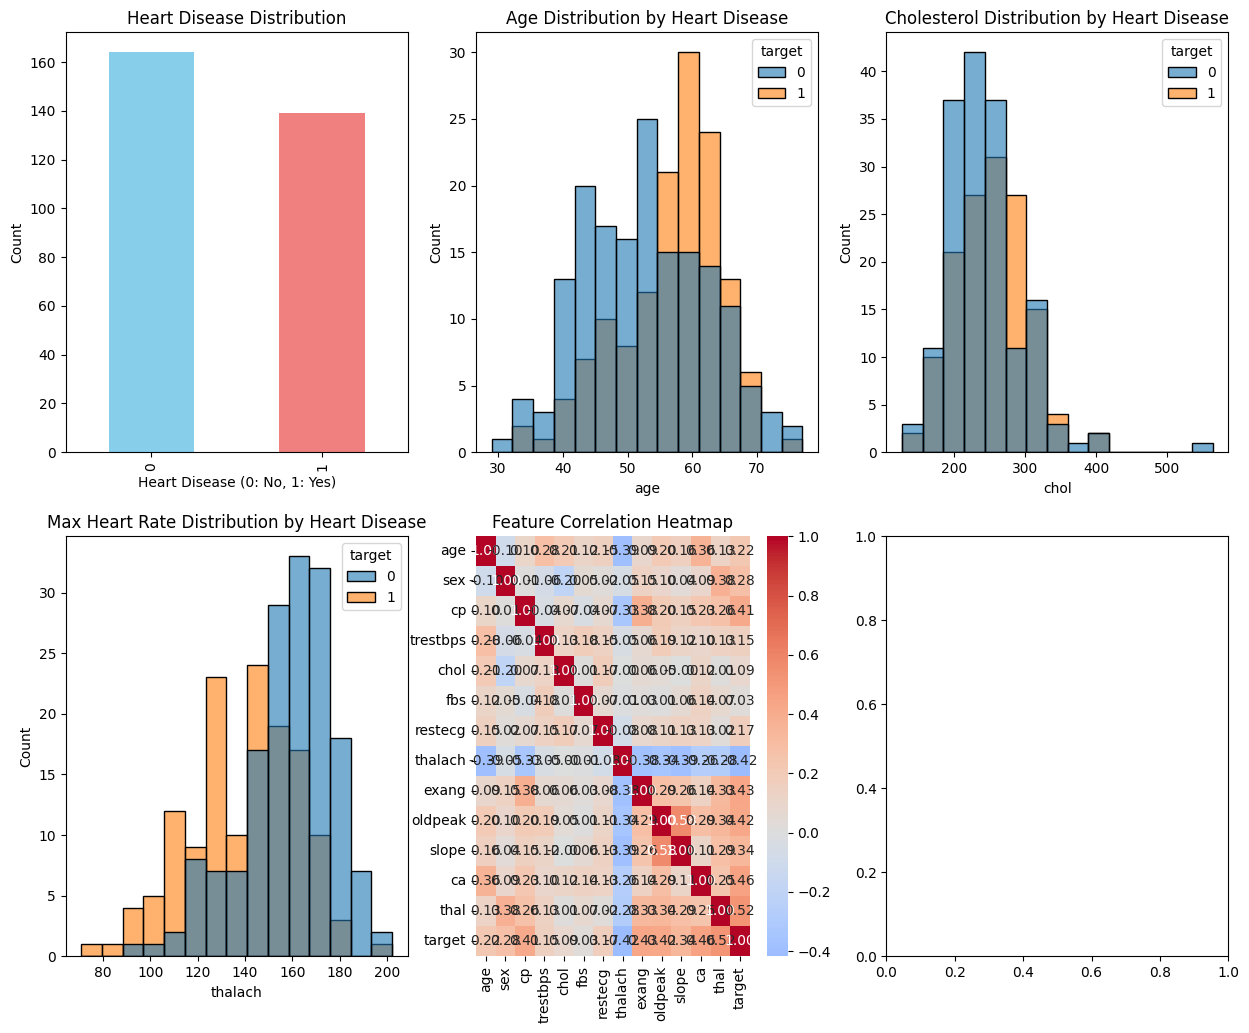

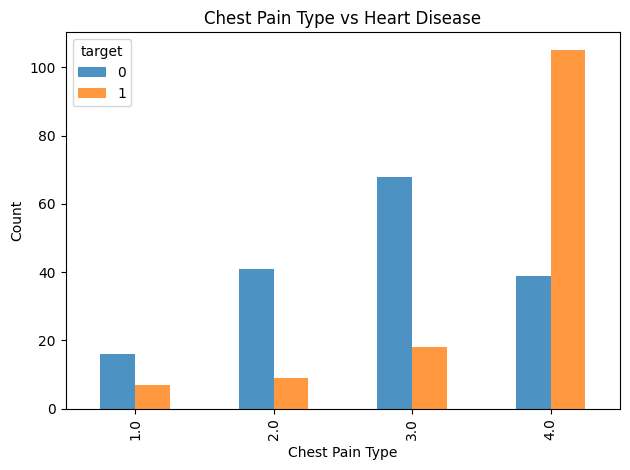

In [19]:
# Exploratory Data Analysis
print("EXPLORATORY DATA ANALYSIS...")

plt.figure(figsize=(15, 12))

# Plot 1: Target distribution
plt.subplot(2, 3, 1)
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')

# Plot 2: Age distribution by target
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='age', hue='target', bins=15, alpha=0.6)
plt.title('Age Distribution by Heart Disease')

# Plot 3: Cholesterol distribution
plt.subplot(2, 3, 3)
sns.histplot(data=df, x='chol', hue='target', bins=15, alpha=0.6)
plt.title('Cholesterol Distribution by Heart Disease')

# Plot 4: Maximum heart rate distribution
plt.subplot(2, 3, 4)
sns.histplot(data=df, x='thalach', hue='target', bins=15, alpha=0.6)
plt.title('Max Heart Rate Distribution by Heart Disease')

# Plot 5: Correlation heatmap
plt.subplot(2, 3, 5)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')

# Plot 6: Chest pain type vs heart disease
plt.subplot(2, 3, 6)
pd.crosstab(df['cp'], df['target']).plot(kind='bar', alpha=0.8)
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Splitting the Data, Training and Processing 

In [20]:
# Model Implementation and Training
print("MODEL IMPLEMENTATION AND TRAINING...")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Hyperparameter tuning for better performance
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
}
# Data Preprocessing and Feature Scaling
print("DATA PREPROCESSING AND FEATURE SCALING...")

# Split data into features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed successfully!")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled testing set shape: {X_test_scaled.shape}")
# Train and tune models
trained_models = {}
model_performance = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Perform grid search
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Store best model
    trained_models[name] = grid_search.best_estimator_
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

MODEL IMPLEMENTATION AND TRAINING...
DATA PREPROCESSING AND FEATURE SCALING...
Features shape: (303, 13)
Target shape: (303,)
Training set: (242, 13), (242,)
Testing set: (61, 13), (61,)
Feature scaling completed successfully!
Scaled training set shape: (242, 13)
Scaled testing set shape: (61, 13)

--- Training Logistic Regression ---
Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best CV score: 0.8034

--- Training K-Nearest Neighbors ---
Best parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best CV score: 0.8193

--- Training Random Forest ---
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best CV score: 0.7869


Performing a Model Evaluaton 

 MODEL EVALUATION...

Logistic Regression Performance:
Accuracy:  0.8525
Precision: 0.7879
Recall:    0.9286
F1-Score:  0.8525


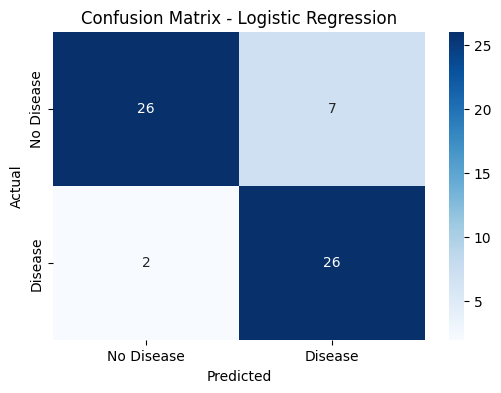


K-Nearest Neighbors Performance:
Accuracy:  0.8525
Precision: 0.7714
Recall:    0.9643
F1-Score:  0.8571


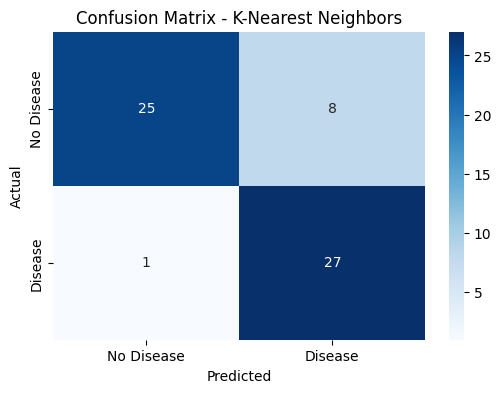


Random Forest Performance:
Accuracy:  0.8689
Precision: 0.8125
Recall:    0.9286
F1-Score:  0.8667


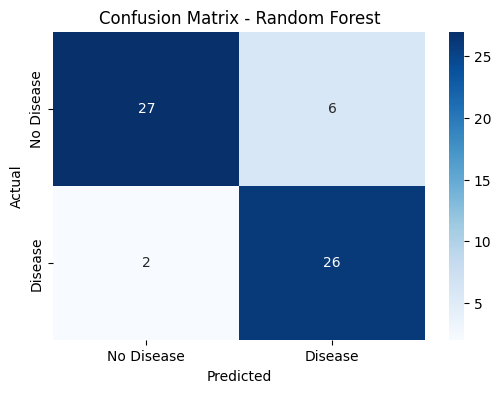

In [21]:
# Model Evaluation
print(" MODEL EVALUATION...")

def evaluate_model(model, X_test, y_test, model_name):
    """Comprehensive model evaluation"""
    # Making predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store performance
    performance = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return performance

# Evaluate all models
for name, model in trained_models.items():
    model_performance[name] = evaluate_model(model, X_test_scaled, y_test, name)

Performing a Comaparative Analysis

 COMPARATIVE ANALYSIS...

Performance Comparison:
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.8525     0.7879  0.9286    0.8525
K-Nearest Neighbors    0.8525     0.7714  0.9643    0.8571
Random Forest          0.8689     0.8125  0.9286    0.8667


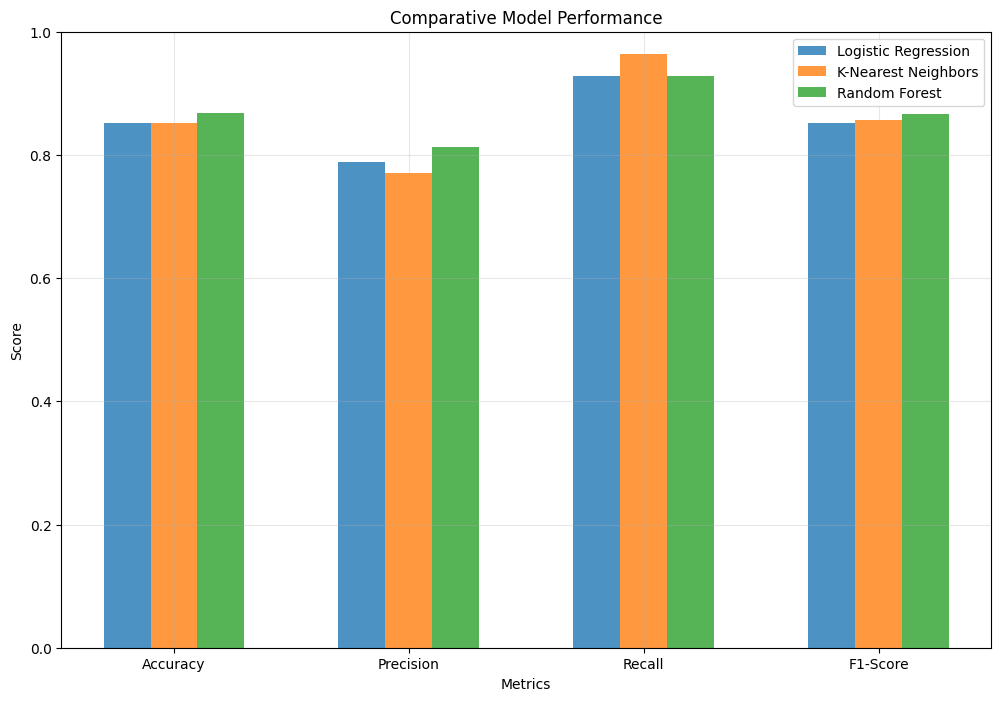


Best Model: Random Forest (F1-Score: 0.8667)


In [22]:
# Comparative Analysis
print(" COMPARATIVE ANALYSIS...")

# Create performance comparison dataframe
performance_df = pd.DataFrame(model_performance).T
print("\nPerformance Comparison:")
print(performance_df.round(4))

# Visual comparison
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(metrics))

for i, model in enumerate(performance_df.index):
    plt.bar(x_pos + i*0.2, performance_df.loc[model, metrics], 
            width=0.2, label=model, alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparative Model Performance')
plt.xticks(x_pos + 0.2, metrics)
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.show()

# Identify best model based on F1-Score (balanced metric)
best_model_name = performance_df['F1-Score'].idxmax()
best_model = trained_models[best_model_name]
print(f"\nBest Model: {best_model_name} (F1-Score: {performance_df.loc[best_model_name, 'F1-Score']:.4f})")

Interpretation of the Model with SHAP

MODEL INTERPRETABILITY WITH SHAP...
Performing SHAP analysis for Random Forest...


<Figure size 1000x800 with 0 Axes>

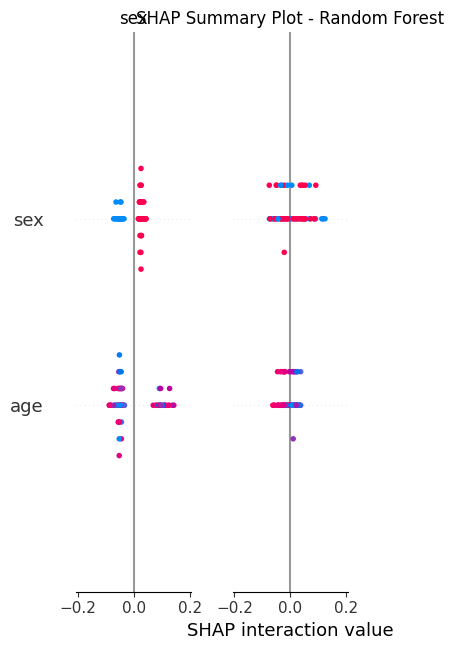

In [23]:
# Model Interpretability with SHAP
print("MODEL INTERPRETABILITY WITH SHAP...")

# Use the best model for SHAP analysis
print(f"Performing SHAP analysis for {best_model_name}...")

if best_model_name == 'Logistic Regression':
    # For linear models, use linear explainer
    explainer = shap.LinearExplainer(best_model, X_train_scaled)
    shap_values = explainer.shap_values(X_test_scaled)
    
elif best_model_name == 'Random Forest':
    # For tree-based models
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test_scaled)
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # For classification, take class 1
    
else:  # KNN - use KernelExplainer
    def predict_proba_wrapper(X):
        return best_model.predict_proba(X)
    
    explainer = shap.KernelExplainer(predict_proba_wrapper, X_train_scaled[:100])
    shap_values = explainer.shap_values(X_test_scaled[:50])

# Create SHAP summary plot
plt.figure(figsize=(10, 8))
if best_model_name != 'K-Nearest Neighbors':
    shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=False)
else:
    shap.summary_plot(shap_values[:,:,1], X_test_scaled[:50], feature_names=X.columns, show=False)
plt.title(f'SHAP Summary Plot - {best_model_name}')
plt.tight_layout()
plt.show()

Analysing Features

DETAILED FEATURE IMPORTANCE ANALYSIS..
Feature Importance Ranking:
     feature  importance
12      thal    0.148313
2         cp    0.132146
11        ca    0.116426
7    thalach    0.116161
9    oldpeak    0.101832
4       chol    0.079317
0        age    0.074212
3   trestbps    0.070996
8      exang    0.054795
10     slope    0.044287
1        sex    0.038555
6    restecg    0.015135
5        fbs    0.007826


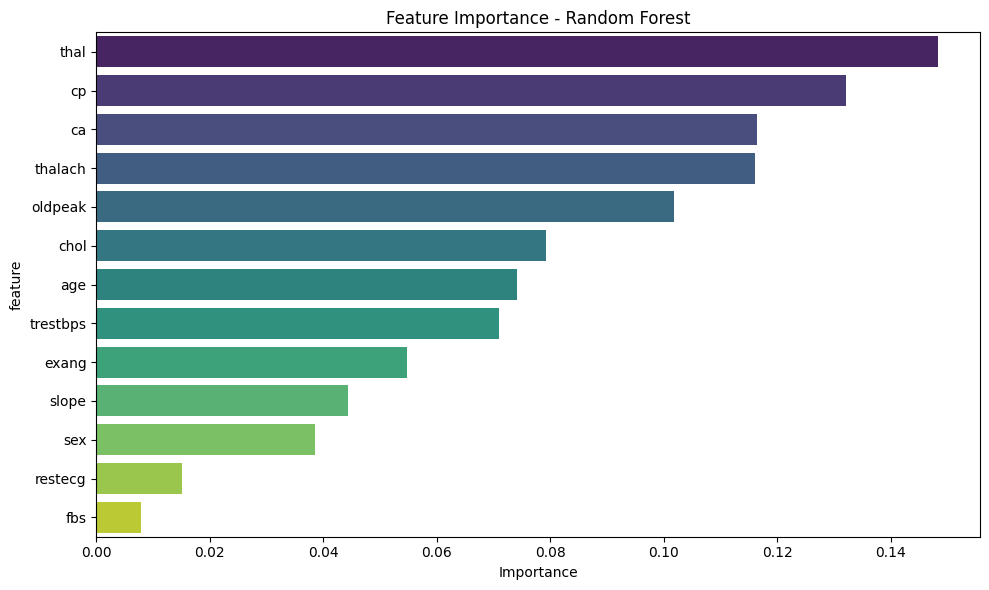

In [24]:
# Detailed Feature Importance Analysis
print("DETAILED FEATURE IMPORTANCE ANALYSIS..")

# Get feature importance based on model type
if best_model_name == 'Logistic Regression':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(best_model.coef_[0])
    }).sort_values('importance', ascending=False)
    
elif best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
else:  # For KNN, use mean absolute SHAP values
    if best_model_name == 'K-Nearest Neighbors':
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': np.mean(np.abs(shap_values[:,:,1]), axis=0)
        }).sort_values('importance', ascending=False)

print("Feature Importance Ranking:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title(f'Feature Importance - {best_model_name}')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

The Clinical Application and Intrepretaion

In [25]:
# Clinical Application and Interpretation
print("CLINICAL APPLICATION AND INTERPRETATION...")

# Analyze top features for clinical relevance
top_features = feature_importance.head(5)['feature'].tolist()
print(f"\nTop 5 Most Important Clinical Features:")
for i, feature in enumerate(top_features, 1):
    description = feature_descriptions.get(feature, 'No description available')
    print(f"{i}. {feature}: {description}")

# Create a simple risk assessment example
print("\nCLINICAL RISK ASSESSMENT EXAMPLE...")
sample_patient = X_test_scaled[0:1]
sample_original = X_test.iloc[0:1]

print("Sample Patient Clinical Data:")
for feature in top_features:
    original_value = sample_original[feature].values[0]
    print(f"  {feature}: {original_value}")

prediction = best_model.predict(sample_patient)[0]
probability = best_model.predict_proba(sample_patient)[0][1]

print(f"\nRisk Assessment:")
print(f"  Heart Disease Prediction: {'HIGH RISK' if prediction == 1 else 'LOW RISK'}")
print(f"  Probability of Disease: {probability:.1%}")

if probability > 0.7:
    print("  Clinical Action: Recommend further diagnostic tests and consultation")
elif probability > 0.3:
    print("  Clinical Action: Monitor closely and consider lifestyle changes")
else:
    print("  Clinical Action: Low risk - routine monitoring recommended")

CLINICAL APPLICATION AND INTERPRETATION...

Top 5 Most Important Clinical Features:
1. thal: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
2. cp: Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)
3. ca: Number of major vessels (0-3) colored by fluoroscopy
4. thalach: Maximum heart rate achieved
5. oldpeak: ST depression induced by exercise relative to rest

CLINICAL RISK ASSESSMENT EXAMPLE...
Sample Patient Clinical Data:
  thal: 3.0
  cp: 4.0
  ca: 0.0
  thalach: 182.0
  oldpeak: 0.0

Risk Assessment:
  Heart Disease Prediction: LOW RISK
  Probability of Disease: 30.2%
  Clinical Action: Monitor closely and consider lifestyle changes


Summary and Recommendation

In [26]:
# Final Summary and Recommendations
print("=== PROJECT SUMMARY AND CONCLUSIONS ===")

print("\nKEY FINDINGS:")
print(f"1. Best Performing Model: {best_model_name}")
print(f"2. Best F1-Score: {performance_df.loc[best_model_name, 'F1-Score']:.4f}")
print(f"3. Best Recall: {performance_df.loc[best_model_name, 'Recall']:.4f}")

print("\nCLINICALLY SIGNIFICANT FEATURES:")
for feature in top_features:
    importance = feature_importance[feature_importance['feature'] == feature]['importance'].values[0]
    print(f"  - {feature} (importance: {importance:.3f})")

print("\nMODEL SUITABILITY FOR LOW-RESOURCE SETTINGS:")
print("✓ Uses readily available clinical parameters")
print("✓ Provides interpretable predictions")
print("✓ Balanced performance across key medical metrics")
print("✓ Identifies high-risk patients effectively")

print("\nRECOMMENDATIONS FOR CLINICAL DEPLOYMENT:")
print("1. Use as a screening tool to identify high-risk patients")
print("2. Combine model predictions with clinical judgment")
print("3. Focus on patients with multiple risk factors")
print("4. Regular model validation with local patient data here in Uganda")

=== PROJECT SUMMARY AND CONCLUSIONS ===

KEY FINDINGS:
1. Best Performing Model: Random Forest
2. Best F1-Score: 0.8667
3. Best Recall: 0.9286

CLINICALLY SIGNIFICANT FEATURES:
  - thal (importance: 0.148)
  - cp (importance: 0.132)
  - ca (importance: 0.116)
  - thalach (importance: 0.116)
  - oldpeak (importance: 0.102)

MODEL SUITABILITY FOR LOW-RESOURCE SETTINGS:
✓ Uses readily available clinical parameters
✓ Provides interpretable predictions
✓ Balanced performance across key medical metrics
✓ Identifies high-risk patients effectively

RECOMMENDATIONS FOR CLINICAL DEPLOYMENT:
1. Use as a screening tool to identify high-risk patients
2. Combine model predictions with clinical judgment
3. Focus on patients with multiple risk factors
4. Regular model validation with local patient data here in Uganda
